In [1]:
import scanpy as sc
import os
import seaborn as sns
import pandas as pd
import numpy as np
import anndata as ad
import bbknn
import muon as mu
from muon import atac as ac
#import pyranges as pr

#import matplotlib
#import matplotlib.pyplot as plt

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
paths = [
    "/faststorage/project/projectsInBioinformatics/workspaces/johan/results/NOA1_atac_ga.h5ad",
    "/faststorage/project/projectsInBioinformatics/workspaces/johan/results/NOA2_atac_ga.h5ad",
    "/faststorage/project/projectsInBioinformatics/workspaces/johan/results/NOA3_atac_ga.h5ad",
    "/faststorage/project/projectsInBioinformatics/workspaces/johan/results/OA1_atac_ga.h5ad",
    "/faststorage/project/projectsInBioinformatics/workspaces/johan/results/OA2_atac_ga.h5ad"
    
            ]

In [3]:
adatas = [sc.read(path) for path in paths]

atac_adata = ad.concat(adatas, label = "dataset", keys = ["A1", "A2", "A3", "A4", "A5"])

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
rna = sc.read("/faststorage/project/projectsInBioinformatics/workspaces/johan/results/combined_rna.h5ad")
adata = ad.concat([atac_adata, rna])

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
adata

AnnData object with n_obs × n_vars = 81406 × 19959
    obs: 'n_genes_by_counts', 'total_counts', 'celltype_leiden', 'dataset'
    obsm: 'X_pca'

In [6]:
sc.external.pp.harmony_integrate(adata, key="dataset")

2025-11-26 15:49:20,197 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-26 15:49:26,750 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-26 15:49:26,973 - harmonypy - INFO - Iteration 1 of 10
2025-11-26 15:49:40,728 - harmonypy - INFO - Iteration 2 of 10
2025-11-26 15:49:51,571 - harmonypy - INFO - Iteration 3 of 10
2025-11-26 15:50:02,181 - harmonypy - INFO - Iteration 4 of 10
2025-11-26 15:50:11,490 - harmonypy - INFO - Iteration 5 of 10
2025-11-26 15:50:22,386 - harmonypy - INFO - Iteration 6 of 10
2025-11-26 15:50:31,050 - harmonypy - INFO - Iteration 7 of 10
2025-11-26 15:50:37,446 - harmonypy - INFO - Iteration 8 of 10
2025-11-26 15:50:43,386 - harmonypy - INFO - Iteration 9 of 10
2025-11-26 15:50:52,163 - harmonypy - INFO - Iteration 10 of 10
2025-11-26 15:51:02,682 - harmonypy - INFO - Converged after 10 iterations


In [7]:
adata.obsm["X_pca"]= adata.obsm["X_pca_harmony"].copy()

In [8]:
bbknn.bbknn(adata, batch_key="dataset", neighbors_within_batch=20)

In [9]:
sc.tl.umap(adata, random_state = 123, min_dist = 0.2)

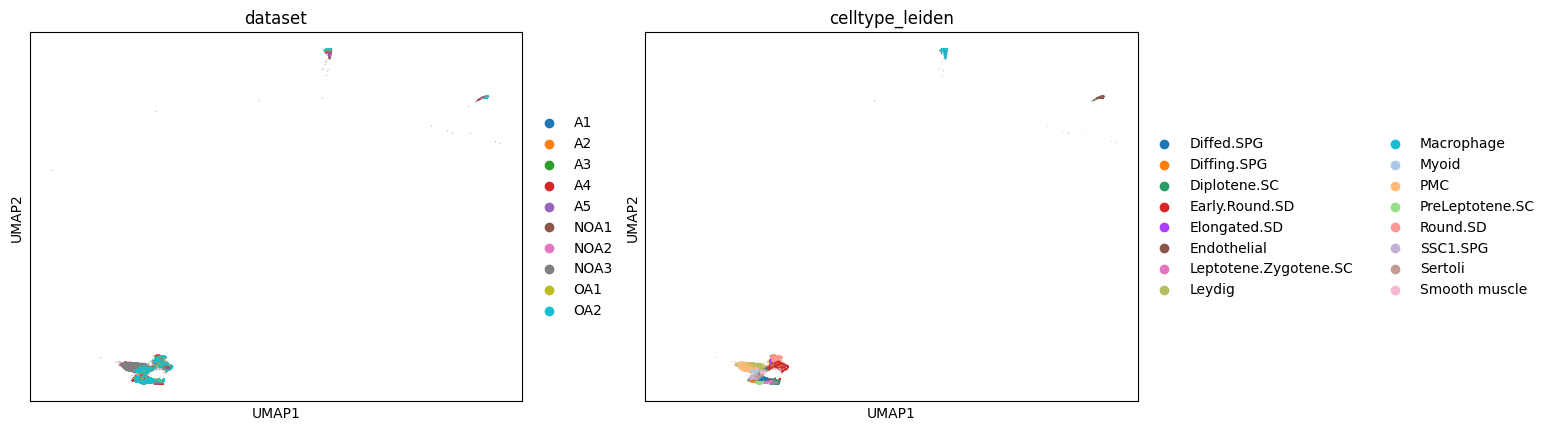

In [10]:
sc.pl.umap(adata, color=["dataset","celltype_leiden"], ncols=2)

In [13]:
somatic_cells = ["Endothelial", "Leydig", "Macrophage", "Myoid", "PMC", "Sertoli", "Smooth muscle"]

somatic_mask = adata.obs["celltype_leiden"].isin(somatic_cells)
germcell_mask = ~adata.obs["celltype_leiden"].isin(somatic_cells) # ~ bitwise not
somatic_subset = adata[somatic_mask].copy()
germcell_subset = adata[germcell_mask].copy()

#germcell_subset = adata[adata.obs["celltype_leiden"] not in ["Macrophage", "Endothelial", "Leydig", "Myoid", "Sertoli", "PMC", "Smooth muscle"]].copy()
#somatic_subset = adata[adata.obs["celltype_leiden"] in ["Macrophage", "Endothelial", "Leydig", "Myoid", "Sertoli", "PMC", "Smooth muscle"]].copy()


/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
sc.external.pp.harmony_integrate(germcell_subset, key="dataset")
sc.external.pp.harmony_integrate(somatic_subset, key="dataset")

2025-11-26 16:08:42,592 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-26 16:08:46,798 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-26 16:08:46,879 - harmonypy - INFO - Iteration 1 of 10
2025-11-26 16:08:51,661 - harmonypy - INFO - Iteration 2 of 10
2025-11-26 16:08:56,369 - harmonypy - INFO - Iteration 3 of 10
2025-11-26 16:09:01,292 - harmonypy - INFO - Converged after 3 iterations
2025-11-26 16:09:01,316 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-26 16:09:07,685 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-26 16:09:07,802 - harmonypy - INFO - Iteration 1 of 10
2025-11-26 16:09:12,014 - harmonypy - INFO - Iteration 2 of 10
2025-11-26 16:09:17,137 - harmonypy - INFO - Iteration 3 of 10
2025-11-26 16:09:22,019 - harmonypy - INFO - Converged after 3 iterations


In [15]:
germcell_subset.obsm["X_pca"]= germcell_subset.obsm["X_pca_harmony"].copy()
somatic_subset.obsm["X_pca"]= somatic_subset.obsm["X_pca_harmony"].copy()

In [16]:
bbknn.bbknn(germcell_subset, batch_key="dataset", neighbors_within_batch=20)
bbknn.bbknn(somatic_subset, batch_key="dataset", neighbors_within_batch=20)

In [20]:
sc.tl.umap(germcell_subset, random_state = 123)
sc.tl.umap(somatic_subset, random_state = 123)

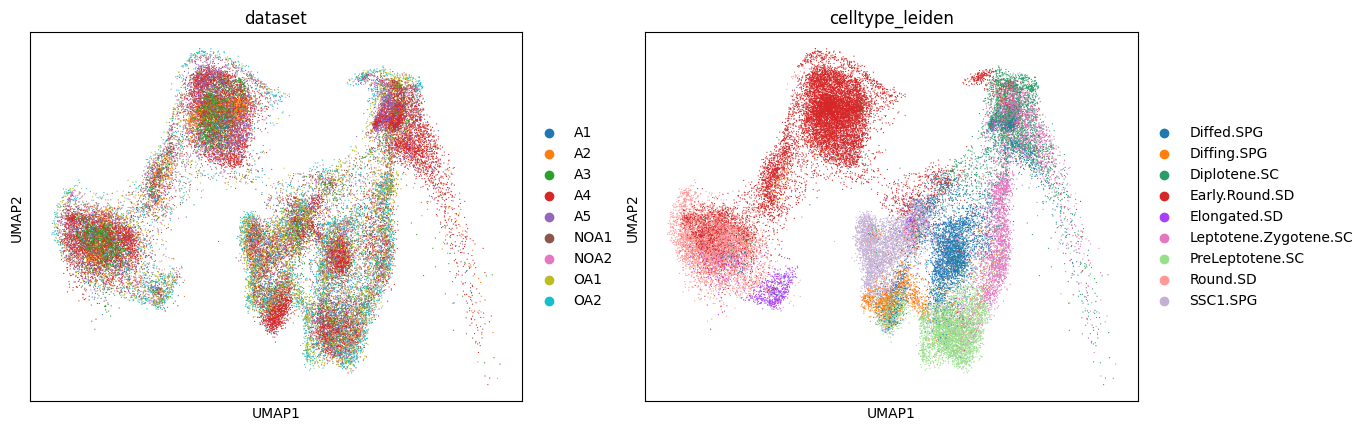

In [21]:
sc.pl.umap(germcell_subset, color=["dataset","celltype_leiden"], ncols=2)

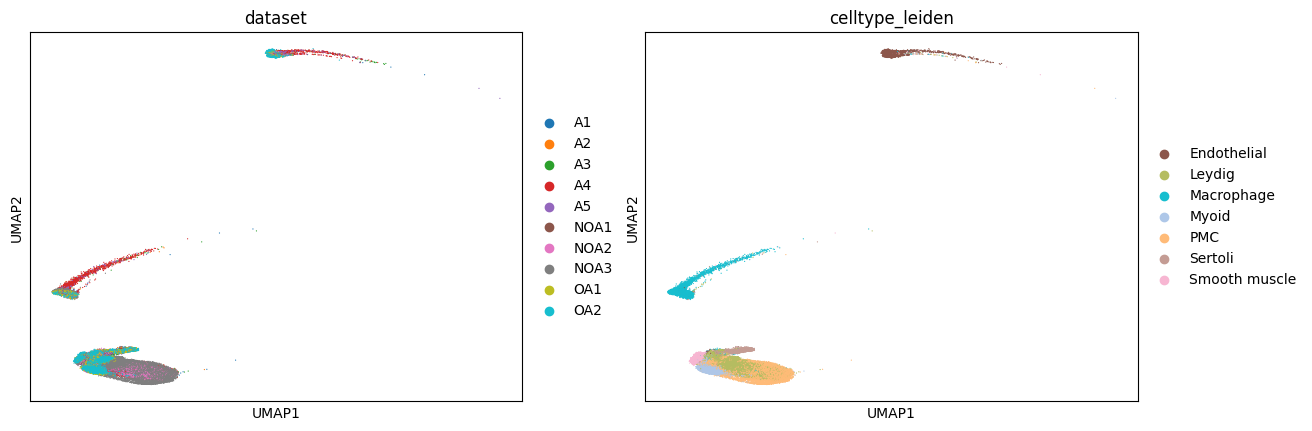

In [22]:
sc.pl.umap(somatic_subset, color=["dataset","celltype_leiden"], ncols=2)